# Installation

In [2]:
!pip install scikit-learn pandas seaborn matplotlib scipy


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [107]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# DataSet Generation

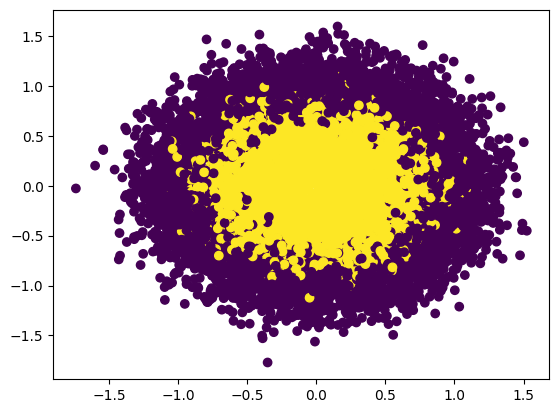

In [253]:
from sklearn.datasets import make_circles

data, classes = make_circles(noise=0.2, factor=0.5, random_state=42, n_samples=10000)
plt.scatter(data[:, 0], data[:, 1], c=classes)

# Data Splitting

In [254]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, classes, train_size=0.8, random_state=42, shuffle=True)

# Training

https://scikit-learn.org/dev/tutorial/machine_learning_map/index.html

In [332]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(train_X, train_y)

SVC()

# Visualizations

Prepare grid with 2 axes, based on dataset coordinates

In [286]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(data[:, 0].min(), data[:, 0].max()),
    np.linspace(data[:, 1].min(), data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

## Decision function / Predict Probability

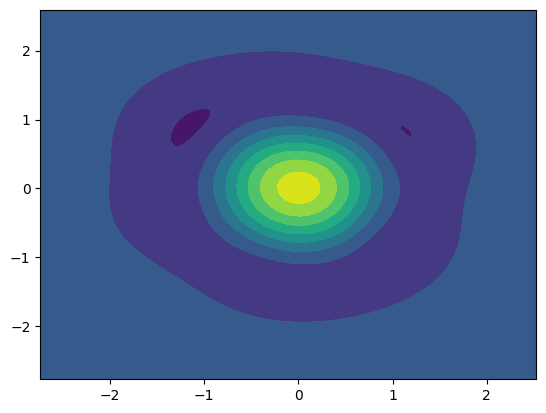

In [335]:
if type(clf) == sklearn.neighbors._classification.KNeighborsClassifier:
    display = DecisionBoundaryDisplay.from_estimator(clf, grid, response_method='predict_proba')
else:
    display = DecisionBoundaryDisplay.from_estimator(clf, grid, response_method='decision_function')

## Prediction

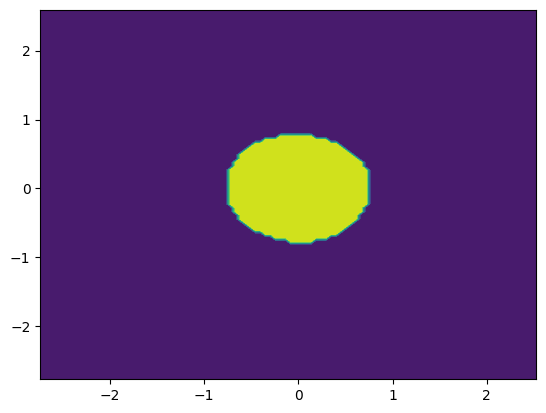

In [336]:
display = DecisionBoundaryDisplay.from_estimator(clf, grid, response_method='predict')

# Metrics

For classification we use a different set of metrics, than for regression

See here: https://scikit-learn.org/dev/modules/model_evaluation.html#classification-metrics

## Confusion Matrix

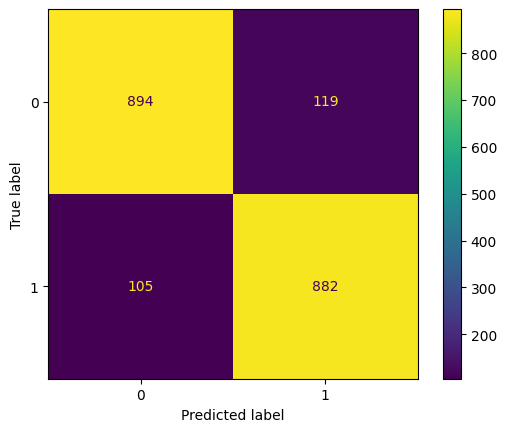

In [337]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

predicted_y = clf.predict(test_X)

conf_matrix = confusion_matrix(test_y, predicted_y)

ConfusionMatrixDisplay(conf_matrix).plot()

## Prediction vs Recall

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

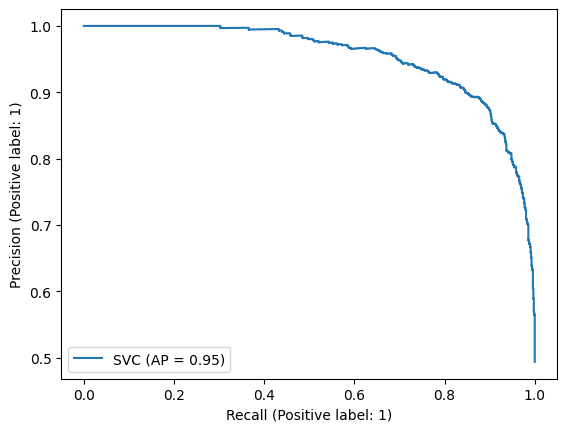

In [338]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(clf, test_X, test_y)

## ROC

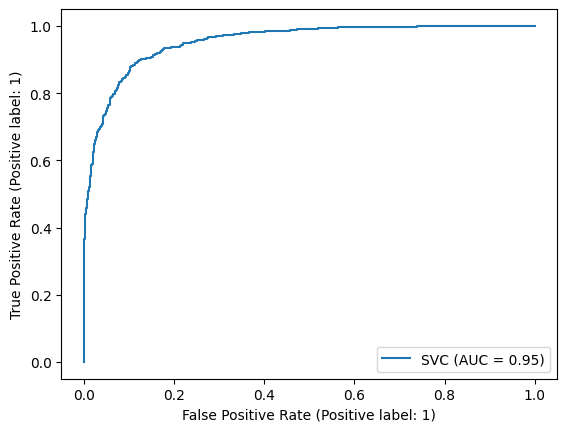

In [339]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, test_X, test_y)

# Hyperparameter tuning

In [340]:
from sklearn.svm import SVC

SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [341]:
from sklearn.model_selection import GridSearchCV

clf2 = SVC()

param_grid = [{
    'C': [0.8, 1, 1.2],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovo', 'ovr']
},
{
    'C': [0.8, 1, 1.2],
    'coef0': [0, 0.1, 0.5, 1],
    'degree': [2, 3, 4, 5],
    'kernel': ['sigmoid'],
    'decision_function_shape': ['ovo', 'ovr']
},
{
    'C': [0.8, 1, 1.2],
    'coef0': [0, 0.1, 0.5, 1],
    'degree': [2, 3, 4, 5],
    'kernel': ['poly'],
    'decision_function_shape': ['ovo', 'ovr']
}
]
    
search = GridSearchCV(clf2, param_grid=param_grid, n_jobs=-1, verbose=1)
search.fit(train_X, train_y)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.8, 1, 1.2],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'kernel': ['rbf']},
                         {'C': [0.8, 1, 1.2], 'coef0': [0, 0.1, 0.5, 1],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [2, 3, 4, 5], 'kernel': ['sigmoid']},
                         {'C': [0.8, 1, 1.2], 'coef0': [0, 0.1, 0.5, 1],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [2, 3, 4, 5], 'kernel': ['poly']}],
             verbose=1)

In [342]:
search.best_params_

{'C': 1.2,
 'coef0': 0.1,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'kernel': 'poly'}

In [343]:
clf2=SVC(C=1.2, coef0=0.1, decision_function_shape='ovo', degree=3, kernel='poly')
clf2.fit(train_X, train_y)

SVC(C=1.2, coef0=0.1, decision_function_shape='ovo', kernel='poly')

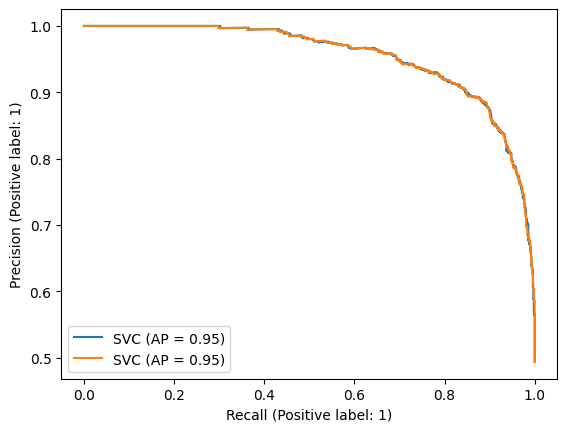

In [322]:
_, ax = plt.subplots()

PrecisionRecallDisplay.from_estimator(clf, test_X, test_y, ax=ax)
PrecisionRecallDisplay.from_estimator(clf2, test_X, test_y, ax=ax)

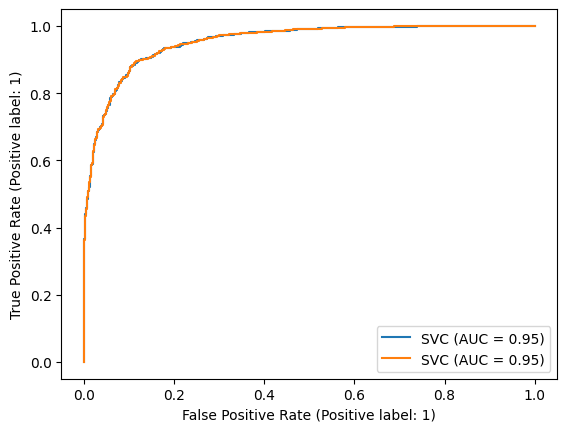

In [320]:
from sklearn.metrics import RocCurveDisplay

_, ax = plt.subplots()
RocCurveDisplay.from_estimator(clf, test_X, test_y, ax=ax)
RocCurveDisplay.from_estimator(clf2, test_X, test_y, ax=ax)
